## BENCHMARKING CLASSIFIERS
### PROCESS

Feed Unprocessed Data into Classifiers and Measure Accuracy

So firstly, we will feed the unprocessed dataset (with Standardization carried out) into 4 classfiers and compare their performances:
- Logistic Regression
- KNeighbors Classifier
- Decision Tree Classifier
- Support Vector Classifier

**From the above, we will chose a classfier as benchmark for our model. ie. We will use the benchmark model for all our future predictions on the dataset before and after the feature selection has been applied on the dataset so that we can correctly compare the effectiveness of our feature selection methodogies.**

### RESULTS

- **For both the training and testing dataset, the highest accuracy was achieved using the Decision Tree Classifier.**

- In both cases, the Logistic Regression performed the worst on the test set.

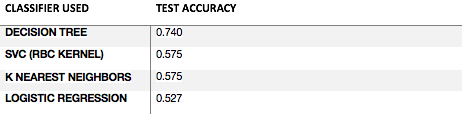
#### Logistic Regression
The logistic regression is a linear classifier as such it draws a linear decision boundary to separate the datasets. So, for our non-linear dataset we expect it to perform poorly and the obeserved accuracy scores confirm this. Logistic Regression can classify non-linear data only when data is augmented by projecting the features on a high-dimensioal space.

#### KNeighbors Classifier
The K Nearest Neighbors classifier from sklearn is a non-linear classifier. It can classify non-linear dataset by creating non-inear decision boundary. In the K-NN model there is no learning, thus we only tune the hyperparameters to create the optimal model. With no hyperparameter tuning, the model can't be expected to perform well. Moreover, our dataset has 500 dimension and KNN suffers from the curse of dimensionality. The curse of dimensionality affects the K-NN model in four ways:

- In high-dimension all neighbors are far away (outliers)!
- Distance calculation is expensive in high-dimension.
- Number of required training data increases exponentially.
- Large number of irrelevant features in high-dimensional data.

#### Decision Tree
Decision Tree Classifier from sklearn predicts the value of a target variable by using data observations to extract simple rules about the data. Decision trees can be fairly robust to noises as it can entirely ignore irrelevant features and only make decisions based on features significant in the classification. In all subsets, the accuracy scores were higher than other models.

#### Support Vector Classifier
In the SVC function from sklearn we use the kernel trick to project the data into a higher dimension. Since the data is non-linear, we use the Radial Basis Function (RBF) kernel. It suffers from a similar issue as the KNN Classifier--all features are maintained in the subset of instances used as support vectors, so the features that are noisy decrease the accuracy.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report

### Load the Data from Pickled DataFrames

In [3]:
'''Load and quick check the data'''
import pandas as pd
df= pd.read_csv("medilon.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,Class
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,2
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,2
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,2
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


**Madelon:** It's not necessary to load in the test set since that's the hold out data to test the classification model's accuracy. Train/test/split on the training data. 


### Run the Data through the Classifiers and obtain Train & Test scores

#### Madelon Dataset

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,Class
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,2
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,2
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,2
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [5]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [6]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Raw Benchmarking with only Standardization for Pre-Preprocessing
We use the out of box default parameters provided by `sklearn` for the selected classification models.

In [8]:
classifier_list = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'SVC']

classifiers = [
    LogisticRegression(n_jobs=-1, random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel= 'rbf', random_state=42)
]

In [9]:
test_scores = {}
train_scores = {}
y_pred = {}

for name, clfr in zip(classifier_list, classifiers):
    clfr.fit(X_train, y_train)
    
    train_score = clfr.score(X_train, y_train)
    test_score = clfr.score(X_test, y_test)
    pred = clfr.predict(X_test)
    
    train_scores[name] = train_score
    test_scores[name] = test_score
    y_pred[name] = pred

c:\users\rojin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rojin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
c:\users\rojin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
print('Train Accuracies:')
train_scores

Train Accuracies:


{'Logistic Regression': 0.7471153846153846,
 'K Nearest Neighbors': 0.7163461538461539,
 'Decision Tree': 1.0,
 'SVC': 0.9725961538461538}

In [11]:
print('Test Accuracies:')
test_scores

Test Accuracies:


{'Logistic Regression': 0.5269230769230769,
 'K Nearest Neighbors': 0.575,
 'Decision Tree': 0.7403846153846154,
 'SVC': 0.575}

In [12]:
print('Performance measures for test set:')
for classifier in sorted(classifier_list):
    print('------',classifier)
    print('Accuracy:', test_scores[classifier])
    print('F1 Score:',f1_score(y_test, y_pred[classifier]))
    print('Precision Score:',precision_score(y_test, y_pred[classifier]))
    print('Recall Score:', recall_score(y_test, y_pred[classifier]))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred[classifier]))
    print()

Performance measures for test set:
------ Decision Tree
Accuracy: 0.7403846153846154
F1 Score: 0.7457627118644069
Precision Score: 0.7226277372262774
Recall Score: 0.7704280155642024
Confusion Matrix:
 [[198  59]
 [ 76 187]]

------ K Nearest Neighbors
Accuracy: 0.575
F1 Score: 0.5386221294363256
Precision Score: 0.581081081081081
Recall Score: 0.5019455252918288
Confusion Matrix:
 [[129 128]
 [ 93 170]]

------ Logistic Regression
Accuracy: 0.5269230769230769
F1 Score: 0.5427509293680297
Precision Score: 0.5195729537366548
Recall Score: 0.5680933852140078
Confusion Matrix:
 [[146 111]
 [135 128]]

------ SVC
Accuracy: 0.575
F1 Score: 0.5725338491295937
Precision Score: 0.5692307692307692
Recall Score: 0.5758754863813229
Confusion Matrix:
 [[148 109]
 [112 151]]



In [13]:
print('Classification Reports:')
for classifier in classifier_list:
    print('----------',classifier)
    print(classification_report(y_test, y_pred[classifier]))

Classification Reports:
---------- Logistic Regression
              precision    recall  f1-score   support

           1       0.52      0.57      0.54       257
           2       0.54      0.49      0.51       263

    accuracy                           0.53       520
   macro avg       0.53      0.53      0.53       520
weighted avg       0.53      0.53      0.53       520

---------- K Nearest Neighbors
              precision    recall  f1-score   support

           1       0.58      0.50      0.54       257
           2       0.57      0.65      0.61       263

    accuracy                           0.57       520
   macro avg       0.58      0.57      0.57       520
weighted avg       0.58      0.57      0.57       520

---------- Decision Tree
              precision    recall  f1-score   support

           1       0.72      0.77      0.75       257
           2       0.76      0.71      0.73       263

    accuracy                           0.74       520
   macro avg     

### Conclusion:
The DecisionTreeClassifier gives us the highest accuracy for both the train and test set, so we will use it as the bench mark model